### Project Venta de Videojuegos
https://www.kaggle.com/datasets/gregorut/videogamesales/data

## Introducción
La industria de los videojuegos es un sector amplio y en constante crecimiento, impulsado por avances tecnológicos que han hecho que los videojuegos sean cada vez más accesibles. En este proyecto, se analizaron las ventas de videojuegos desde 1980 hasta 2016, centrándose en las cifras de ventas, las plataformas, los géneros y las regiones. El objetivo fue identificar patrones y obtener información clave para comprender qué juegos tienen éxito, qué plataformas son las más populares y cuáles son los productores que dominan el mercado. Además, se examinó cómo estas variables varían según las regiones, incluyendo Norteamérica, Europa, Japón y el resto del mundo. Los conocimientos adquiridos en este análisis aportan una comprensión más profunda sobre los factores que contribuyen al éxito de los videojuegos en esta industria.

### Validación de Datos

El conjunto de datos inicial contenía 16,598 filas y 11 columnas antes de los procesos de limpieza y validación. A continuación, se detalla la información de las variables incluidas:
1. Rank: Clasificación basada en las ventas globales. Sin valores faltantes (el mismo juego en diferentes plataformas se cuenta como valores distintos).
2. Name: Nombre del videojuego. Sin valores faltantes.
3. Platform: Plataforma en la que se lanzó el juego (ej. PC, PS4, etc.). Sin valores faltantes.
4. Year: Año de lanzamiento del juego. 271 valores faltantes, que se eliminaron durante el proceso de limpieza.
5. Genre: Género del juego. Sin valores faltantes.
6. Publisher: Editor del juego. 58 valores faltantes, eliminados en el proceso de limpieza.
7. NA_Sales: Ventas en Norteamérica (en millones). Sin valores faltantes.
8. EU_Sales: Ventas en Europa (en millones). Sin valores faltantes.
9. JP_Sales: Ventas en Japón (en millones). Sin valores faltantes.
10. Other_Sales: Ventas en el resto del mundo (en millones). Sin valores faltantes.
11. Global_Sales: Ventas totales a nivel mundial. Sin valores faltantes.


In [2]:
### Importamos librerías
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker
import seaborn as sns


In [4]:
### Agregamos Dataset
df = pd.read_csv('Datasets/vgsales.csv')

In [5]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [27]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
name_game = df.value_counts("Name")
len(name_game)

11493

In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
# Identificacion de datos ausentes
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [13]:
### Eliminar filas con valores nulos
df = df.dropna()

In [25]:
# Identificacion de datos ausentes
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [24]:
df.shape

(16291, 11)

In [23]:
df.drop_duplicates()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.00,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.00,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.00,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.00,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [22]:
Year = df["Year"].value_counts().sort_index()
print(Year)

Year
1980.00       9
1981.00      46
1982.00      36
1983.00      17
1984.00      14
1985.00      14
1986.00      21
1987.00      16
1988.00      15
1989.00      17
1990.00      16
1991.00      41
1992.00      43
1993.00      60
1994.00     121
1995.00     219
1996.00     263
1997.00     289
1998.00     379
1999.00     338
2000.00     349
2001.00     482
2002.00     829
2003.00     775
2004.00     744
2005.00     936
2006.00    1008
2007.00    1201
2008.00    1428
2009.00    1431
2010.00    1257
2011.00    1136
2012.00     655
2013.00     546
2014.00     580
2015.00     614
2016.00     342
2017.00       3
2020.00       1
Name: count, dtype: int64


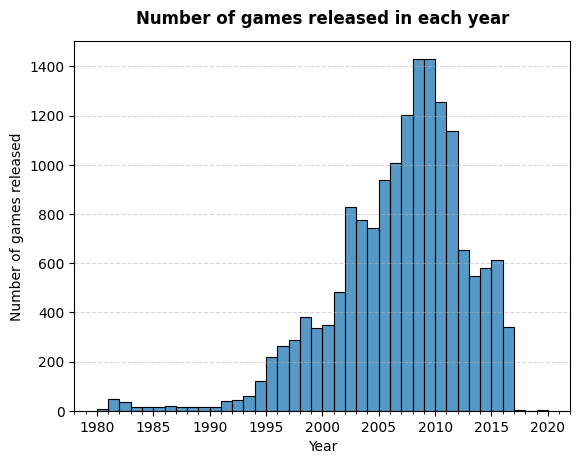

In [20]:
# Create histogram plot of number of games released each year
sns.histplot(data=df, x="Year", binwidth=1)

# Set x-label, y-label, and plot title
plt.xlabel('Year')
plt.ylabel('Number of games released')
plt.title('Number of games released in each year',y=1.025, fontsize=12, fontweight="bold")

# Set minor x-axis ticks
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))

# Add gridlines on the y-axis with dashed style, z-order 0, and alpha 0.5
plt.grid(axis='y', linestyle='--', zorder=0, alpha=0.5)

# Show the plot
plt.show()

In [19]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.00,16291.00,16291.00,16291.00,16291.00,16291.00,16291.00
mean,8290.19,2006.41,0.27,0.15,0.08,0.05,0.54
std,4792.65,5.83,0.82,0.51,0.31,0.19,1.57
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4132.50,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8292.00,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12439.50,2010.00,0.24,0.11,0.04,0.04,0.48
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [18]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.00,16291.00,16291.00,16291.00,16291.00,16291.00,16291.00
mean,8290.19,2006.41,0.27,0.15,0.08,0.05,0.54
std,4792.65,5.83,0.82,0.51,0.31,0.19,1.57
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4132.50,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8292.00,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12439.50,2010.00,0.24,0.11,0.04,0.04,0.48
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74
